<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/main/Lesson_03_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------

**COPYRIGHT NOTICE:** This Jupyterlab/Colab notebook is a companion supplement to the textbook _Principles of Biostatistics_ by M. Pagano. K. Marcello and H. Mattie (3rd ed) published in 2022 by CRC Press. It is designed to be used in conjunction with -- not as a standalone substitute for – this textbook.  

This notebook is licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at
>http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 5853: Biostatistics**

##### **Module 3: Inference**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 3 Material

* Part 3.1: Confidence Intervals
* Part 3.2: Hypothesis Testing
* Part 3.3: Comparison of Two Means
* Part 3.4: Analysis of Variance (ANOVA)
* Part 3.5: Nonparametric Methods
* Part 3.6: Inference on Proportions
* Part 3.7: Contingency Tables
* Part 3.8: Correlation
* Part 3.9: Simple Linear Regression
* **Part 3.10: Multiple Linear Regression**
* Part 3.11: Logistic Regression
* Part 3.12: Survival Analysis

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CODE CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


# **Part 3.10: Multiple Linear Regression**

**_Multiple linear regression_** is a statistical technique used to understand the relationship between one dependent variable and two or more independent variables. Essentially, it helps in predicting the value of the dependent variable based on the values of the independent variables. It does this by fitting a linear equation to the observed data. Here is the equation for multiple linear regression:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_q x_q + \epsilon $$

where:

* *$y$* is the dependent variable.
* *$\beta_0$* is the y-intercept.
* *$\beta_1, \beta_2 \cdots , \beta_q$* are the coefficients.
* *$x_1, x_2,\cdots, x_q$* are the independent variables.
* *$\epsilon_1$* is the error term.

#### **Importance for Biostatistics**

* **Predictive Modeling:** Helps predict outcomes (e.g., predicting disease risk based on an exposure level).
* **Adjusting for Confounders:** Controls for confounding variables, isolating the effect of interest.
* **Understanding Complex Relationships:** Models complex interactions between variables, crucial in understanding multifactorial diseases.
* **Statistical Power:** Increases the power of statistical tests by utilizing more information.

### **Introduction**

In the preceding chapter, we saw how simple linear regression can be used to explore the nature of the relationship between two continuous random variables. In particular, it allows us to predict the value of a response or outcome that corresponds to a given value of an explanatory variable. If knowing the value of a single explanatory variable improves our ability to predict the response, however, we might suspect that additional explanatory variables could be used to our advantage. To investigate the more complicated relationship among a number of different variables, we use a natural extension of simple linear regression known as **_multiple linear regression_**, or **_multivariable linear regression_**.




## **Datasets for this Lesson**

In this lesson we will be using 3 datasets that we need to download from the course file server and store in DataFrames.

### Example 1: Read Datafile

We will be using a datafile called `lowbwt_hc.csv` stored on the course HTTPS server. As the file is read, the data is stored in a DataFrame called `bwtDF`.

_Data Description:_

This file contains head circumference measurements in cm for a population of low birth weight infants--defined as those weighing less than 1500 gms--born in two teaching hospitals in Boston, Massachusetts. The mean head circumference for the infants in this population is

$$ \mu_y = 27.0 cm $$

In [2]:
# Example 1: Read datafile

import pandas as pd

# Read datafile and create DataFrame
bwtDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/lowbwt_hc.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 10)

# Display DataFrame
display(bwtDF)

,headcirc,length,gestage,birthwt,momage,preeclamp,gestage_cat,ga_28_29,ga_30_31,ga_ge32
1,27,41,29,1360,37,0,2,1,0,0
2,29,40,31,1490,34,0,3,0,1,0
3,30,38,33,1490,32,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
98,28,35,32,880,35,1,4,0,0,1
99,28,41,33,1320,36,1,4,0,0,1
100,26,38,28,1080,36,0,2,1,0,0


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image01.png)

This dataset is an expanded version of the dataset used in Lesson_03_9. In addition to the columns `headcirc`, `gestage`, and `birthwt`, this dataset also contains information about the infant's length (`length`), the mother's age (`momage`) and the column `preeclamp`, which indicates whether, or not, the mother experienced **_preeclampsis_** during her pregnancy. _Preeclampsia_ is a pregnancy complication characterized by high blood pressure and signs of damage to other organs, most often the kidneys. It usually begins after 20 weeks of pregnancy in women whose blood pressure had previously been normal. If left untreated, preeclampsia can lead to serious complications for both the mother and baby, including fetal growth restriction, preterm birth, and even seizures in the mother (a condition known as eclampsia).

You should also note that this dataset does not contain the column `count`. We will have to write our own code to compute the number of times the same values for `headcirc` and `gestage` were recorded. As you should recall, the `count` value will be used below to change the marker size in scatterplots of this dataset.

### **Exercise 1: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `birthwt.txt` stored on the course HTTPS server. As the file is read, store it in a new Pandas DataFrame called `smokeDF`.

_Code Notes:_

In order to read this file correctly, you must make two code changes:

1. Comment out the line `index_col=0,`
2. Change the argument `sep` from a comma `','` to a space `' ' `.

_Data Description:_

The `birthwt` dataset from the MASS package is used to study risk factors associated with low infant birth weight. Here's a brief description of the dataset:

**Description:**
- **Source**: The data was collected at Baystate Medical Center in Springfield, Massachusetts, during 1986.
- **Rows and Columns**: The dataset contains **189 rows** and **10 columns**.
- **Purpose**: The goal was to identify factors that contribute to low birth weight in infants.

**Columns:**
1. **low**: Indicator of birth weight less than 2.5 kg (0 = no, 1 = yes).
2. **age**: Mother's age in years.
3. **lwt**: Mother's weight in pounds at the last menstrual period.
4. **race**: Mother's race (1 = white, 2 = black, 3 = other).
5. **smoke**: Smoking status during pregnancy (0 = no, 1 = yes).
6. **ptl**: Number of previous premature labors.
7. **ht**: History of hypertension (0 = no, 1 = yes).
8. **ui**: Presence of uterine irritability (0 = no, 1 = yes).
9. **ftv**: Number of physician visits during the first trimester.
10. **bwt**: Birth weight in grams.




In [3]:
# Insert your code for Exercise 1 here



If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image02.png)

**WARNING:** If your output doesn't look **_exactly_** like this, it probably means that you didn't change the `sep` argument. Don't proceed until you have correctly read this file.

If you don't correct the error, most of your **Exercises** in this lesson will produce errors.

## **The Model**

Using multiple linear regression analysis, we estimate the population equation

$$ \mu_{y|x_1, x_2, \ldots, x_q} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_q x_q $$

where $x_1, x_2 \cdots$ and $x_q$ are the outcomes of $q$ distinct explanatory variables $X_q, X_q,\cdots$ and $X_q$ and $\mu_{y|x_1, x_2, \cdots, x_q}$ is the mean value of $y$ when the explanatory variables assume these particular values. That parameters $\beta_1, \beta_2 \cdots$ and $\beta_q$ are constants and coefficients of the equation. Mathematically, the y-intercept $\beta_0$ is the mean value of the response $y$ when all the explanatory variables take the value `0` or $\mu_{y|0,0,...,0}$. The slope $\beta_i$ is the change in the mean value of $y$ that corresponds to a one unit increase in $x_i$ given that all other explanatory variables in the model remain constant.

To accomodate the natural variation in measures of the response--we do not expect all subjects with the same values of the explanatory variables to have exactly the same outcome--we actually fit a model of the form

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_q x_q + \epsilon $$

#### **Least Squares Regression Equation**

To estimate the population regression equation, we use the method of least squares to fit the model

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \cdots + \hat{\beta}_q x_q $$

This technique requires that we minimize the sum of squares of the residuals, in this case

$$ \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{1i} - \hat{\beta}_2 x_{2i} - \cdots - \hat{\beta}_q x_{qi})^2. $$

This equation represents the sum of squared errors (SSE) in the context of a multiple linear regression model. It expresses the SSE as the sum of the squared differences between the observed values $y_i$ and the predicted values $\hat{y_i}$. The predicted values are further expanded in terms of the regression coefficients $\hat\beta_0, \hat\beta_1, \cdots, \hat\beta_q$ and the predictor variables $x_{1i},x_{2i}, \cdots, x_{qi}$.

### **Does Head Circumference Depend on Birth Weight?**

We might wonder whether head circumference also depends on the birth weight of an infant. **Figure 18.1** is a two-way scatter plot of head circumference versus birth weight for a sample of 100 low birth weight infants born in Boston, Massachusetts. The graph suggests that head circumference increases as birth weight increases. Given that we have already accounted for gestational age, does birth weight further improve our ability to predict the head circumference of a child?

  

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image03.png)

**FIGURE 18.1**  Head circumference versus birthweight for a sample of 100 low birth weight infants

### Example 2: Two-Way Scatter Plot

The code in the cell below shows how to recreate **Figure 18.1** using Python.

_Code Decription:_

This code chunk that extracts the `x`, `y` and `count` values as numpy arrays:

```python
# Extract x- y-values and counts
x = np.array(bwtDF['birthwt'])
y = np.array(bwtDF['headcirc'])
```

This dataset does not have a separate column (e.g. `count`) containing the number of times a particular gestational age/head circumference measurement was repeated. So we will compute this data ourselves.

Here is the first step for creating a "count" column using the Pandas method `df.group()`. Here we are grouping by size.

```python
# Count occurrences of each pair (x, y)
pair_counts = df.groupby(['x', 'y']).size().reset_index(name='count')
```

This line of code is performing a few key operations on a pandas DataFrame:

1. **Grouping:**

* **`df.groupby(['x', 'y']):`** Groups the DataFrame df by the columns 'x' and 'y'. This means it identifies unique pairs of 'x' and 'y' values.

2. **Counting Occurrences:**

* **`.size():`** Computes the size of each group, essentially counting how many times each pair of 'x' and 'y' appears in the DataFrame.

3. **Resetting Index:**

* **`.reset_index(name='count'):`** Converts the resulting series back into a DataFrame and assigns a new column named 'count' to hold the counts of each pair.

The result is a DataFrame called `pair_counts` with three columns:
* **`'x':`** Unique values from the original 'x' column.
* **`'y':`** Unique values from the original 'y' column.
* **`'count':`** Number of occurrences of each unique ('x', 'y') pair.

The next step is to merge our new DataFrame `pair_counts` with our orignial DataFrame `df` using the Pandas `df.merge()` method. This creates a new DataFrame called `df_with_counts`.

```python
# Merge counts back to the original DataFrame
df_with_counts = df.merge(pair_counts, on=['x', 'y'], how='left')
```

We then extract the `count` data from the DataFrame `df_with_count` into a Numpy array called `counts`.

```python
# Extract counts as numpy array
counts = np.array(df_with_counts['count'])
```

Finally, the code chunk here is the code chunk that generates the scatter plot:

```python
# Create the scatter plot with varying marker size
scatter = ax.scatter(x,y, s=counts*30, facecolor='white', edgecolor=color_1)
```

The argument `s` species the marker size. The marker size is increased by a factor of `30` with `s=counts*30`.

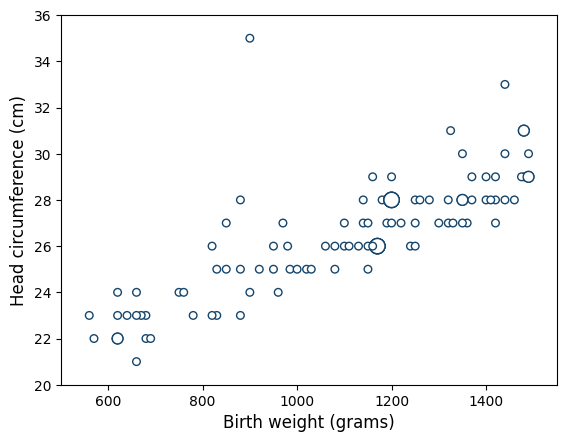

In [4]:
# Example 2: Two-Way Scatter Plot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract x- y-values and counts
x = np.array(bwtDF['birthwt'])
y = np.array(bwtDF['headcirc'])

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Count occurrences of each pair (x, y)
pair_counts = df.groupby(['x', 'y']).size().reset_index(name='count')

# Merge counts back to the original DataFrame
df_with_counts = df.merge(pair_counts, on=['x', 'y'], how='left')

# Extract counts as numpy array
counts = np.array(df_with_counts['count'])

# Create plotting environment
fig, ax = plt.subplots()

# Assign values
color_1 = '#15466d' # Dark blue

# Create the scatter plot with varying marker size
scatter = ax.scatter(x,y, s=counts*30, facecolor='white', edgecolor=color_1)

# Set x and y limits
ax.set(xlim=(500,1550))
ax.set(ylim=(20,36))

# Adding labels
# Set the x and y labels
ax.set_xlabel('Birth weight (grams)',fontsize=12)
ax.set_ylabel('Head circumference (cm)',fontsize=12)

# Display the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image04.png)

The graph suggests that head circumference increases as birth weight increases. There is clearly one suspicious data point (birth wt = 900 gms, head circumference 35.5 cm). We will need to keep an eye on it.

### **Exercise 2: Two-Way Scatter Plot**

In the cell below, write the code to generate a two-scatter plot with `x` being the data in the column `babyDF['lwt']` and `y` being the data in column `babyDF['bwt']` . In other words, plot the baby's birth weight as a function of the mother's weigth before she became pregnant.

_Code Hints:_

1. You will need to comment out the lines of code that set the `x-lim` and the `y-lim` to see your plot. Matlabplot will automatically pick reasonable values for you.
2. Change your `xlabel` to read "Mother's Weight (lbs)" and your `ylabel` to read "Baby's Birth Weight (gm)".

In [5]:
# Insert your code for Exercise 2 here



If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image20.png)

Because the plot of the mother's weight and her baby's weight shows a considerable degree of random scatter, we know already that if a correlation exists, it will be rather small. In other words, the likelihood of small mothers giving birth to small babies and large mothers giving birth to large babies appears about the same as small mothers giving birth to large babies and large mothers giving birth to small babies in this particular study.

### Example 3: Multiple Linear Regression

The code in the cell below shows how to perform multiple regression analysis on the DataFrame `bwtDF` using the `statsmodel.api`. In the previous lesson (Lesson_03_9) we determined that a simple linear model of head circumference ($y$) as a function of gestational stage ($x$):

~~~text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     152.9
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.00e-21
Time:                        18:40:07   Log-Likelihood:                -187.28
No. Observations:                 100   AIC:                             378.6
Df Residuals:                      98   BIC:                             383.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9143      1.829      2.140      0.035       0.284       7.544
x              0.7801      0.063     12.367      0.000       0.655       0.905
==============================================================================
~~~
The R-square value = 0.609 indicated that about 60% of the differences in the head circumference of the 100 infants could be accouted for simply by their gestational stage. In other words, the head circumference increased during development.  

But that leaves 40% of the variation that is still not accounted for. From **Figure 18.1** is reasonable to ask how much this unaccounted for variation might be due to differences in the infant's birth weight? The code in this example provides this information using **_multiple linear regression_**.

_Code Description:_

In this code example, we have omitted the step of extracting the each variable into a Numpy and creating a new DataFrame `df` with the extracted values. Instead, we simply extract the values from the DataFrame `bwtDF` directly into a DataFrame called `X` as shown in this code chunk:

```python
# Create X with independent variables
X = sm.add_constant(bwtDF[['gestage','birthwt']])  

```

Here are the first three values in the DataFrame `X`. You should note that a new column called `const` containing only the value `1.00` has also been added to `X`.

```python
     const  gestage  birthwt
1      1.0       29     1360
2      1.0       31     1490
3      1.0       33     1490
```

Adding a constant in regression analysis, like in `sm.add_constant(bwtDF[['gestage', 'birthwt']])`, is crucial because it includes the intercept term in the regression model. The intercept represents the value of the dependent variable when all independent variables are zero. Without this constant, your regression model would be forced through the origin (0,0), which is often unrealistic and can lead to biased estimates of your coefficients. Including an intercept ensures your regression model more accurately reflects the relationship between the dependent and independent variables. It’s a small but significant step in regression modeling.

Finally, here is the code chunk that peforms the multiple linear regression:

```python
# Fit regression model
model = sm.OLS(bwtDF['headcirc'], X).fit()
```

This creates a variable called `model`. Technically, the variable `model` is a `statsmodels.regression.linear_model.RegressionResultsWrapper`. Despite it's complex type, it's simple to extract all of the information contained in this variable with this line of code:

```python
# Print results
print(model.summary())
```

In [6]:
# Example 3: Multiple Linear Regression

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Create X with independent variables
X = sm.add_constant(bwtDF[['gestage','birthwt']])

# Fit regression model
model = sm.OLS(bwtDF['headcirc'], X).fit()

# Print header
print("-----Model Summary -------------------------------------------------------------")
# Print results
print(model.summary())

-----Model Summary -------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:               headcirc   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     147.1
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           4.28e-30
Time:                        19:50:34   Log-Likelihood:                -164.58
No. Observations:                 100   AIC:                             335.2
Df Residuals:                      97   BIC:                             343.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

If the code is correct, you should see the following table:

~~~text
-----Model Summary -------------------------------------------------------------
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               headcirc   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           4.28e-30
Time:                        19:18:57   Log-Likelihood:                -164.58
No. Observations:                 100   AIC:                             335.2
Df Residuals:                      97   BIC:                             343.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3080      1.579      5.262      0.000       5.174      11.442
gestage        0.4487      0.067      6.673      0.000       0.315       0.582
birthwt        0.0047      0.001      7.466      0.000       0.003       0.006
==============================================================================
Omnibus:                      108.320   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1901.434
Skew:                           3.489   Prob(JB):                         0.00
Kurtosis:                      23.190   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
~~~

_From your textbook, page 432:_

>Suppose that we let $x_1$ represent gestational age and $x_2$ designate birth weight. The fitted least squares regression equation is

$$ \hat{y} = 8.3080 + 0.4487x_1 + 0.0047x_2 $$

>The intercept of 8.3080 cm is, in theory, the mean value of head circumference for low birth weight infants with gestational age 0 weeks and birth weight 0 grams. In this example, neither an age of  0 nor a weight of 0 makes sense, so we will not attempt to interpret the y-intercept. The estimated coefficient of gestational age is not what it was when age was the only explanatory variable in the  model; its value has decreased from 0.7801 to 0.4487 cm/week. This implies that, given that a child’s birth weight remains constant, each one week increase in gestational age corresponds to a 0.4487 cm.

We can see that all of the regression values stated in this textbook discussion can be found in the summary output under the column called `coef`:

~~~text
                 coef   
---------------------
const          8.3080
gestage        0.4487  
birthwt        0.0047  
~~~

In the summary output, the slope (`8.3080`) is printed as the coefficient of $const$ (`8.3080`), the coefficient of $x_1$ (`0.4487`) is printed as the coefficient of `gestage` (`0.4487`) and the coefficient of $x_2$ (`0.0047`) is shown as the coefficient of `birthwt` (`0.0047`).

As described above in the introduction to Example 3, the actual column names in the DataFrame were used as inputs into the regression equation, instead of the more cryptic `x1` and `x2`. However you are free to use either approach since both methods produce exactly the same output.

### **Exercise 3: Multiple Linear Regression**

In the cell below, write the code to perform multiple regression analysis on the DataFrame `babyDF` using the statsmodel.api.

Here are the 10 column names in the DataFrame `babyDF`:
1. low
2. age
3. **lwt**
4. **race**
5. smoke
6. ptl
7. **ht**
8. **ui**
9. ftv
10. bwt

For your multiple linear regression, use the 4 column names that are shown in **boldface** as your independent variables (`X`) and the column `bwt` as your dependent variable.    

In [7]:
# Insert your code for Exercise 3 here


If your code is correct, you should see the following output:

~~~text
-----Model Summary -------------------------------------------------------------
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     9.370
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           6.49e-07
Time:                        10:06:51   Log-Likelihood:                -1496.0
No. Observations:                 189   AIC:                             3002.
Df Residuals:                     184   BIC:                             3018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2761.0020    260.647     10.593      0.000    2246.760    3275.244
lwt            4.0481      1.687      2.399      0.017       0.719       7.377
race        -118.5385     54.218     -2.186      0.030    -225.507     -11.570
ht          -634.6306    207.215     -3.063      0.003   -1043.453    -225.808
ui          -558.0093    139.641     -3.996      0.000    -833.512    -282.507
==============================================================================
Omnibus:                        1.755   Durbin-Watson:                   0.467
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.547
Skew:                          -0.091   Prob(JB):                        0.461
Kurtosis:                       2.596   Cond. No.                         732.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~

Here is a detailed analysis of the output shown above:

### Analysis of Multiple Regression Output

#### Model Summary
- **Dependent Variable**: `bwt` (birth weight)
- **R-squared**: 0.169
  - This indicates that 16.9% of the variance in the dependent variable `bwt` is explained by the independent variables `lwt` (last menstrual period weight), `race`, `ht` (history of hypertension), and `ui` (uterine irritability).
- **Adjusted R-squared**: 0.151
  - This adjusted value accounts for the number of predictors in the model and shows a slight decrease compared to the R-squared value.
- **F-statistic**: 9.370
  - A moderate F-statistic value suggests that the overall regression model has some explanatory power.
- **Prob (F-statistic)**: 6.49e-07
  - This very low p-value indicates that the model is statistically significant at the 0.05 level.

#### Coefficients and Significance
- **Constant (Intercept)**:
  - **Coefficient**: 2761.0020
  - **Standard Error**: 260.647
  - **t-value**: 10.593
  - **P-value**: 0.000
  - **[95% CI]**: [2246.760, 3275.244]
  - The intercept represents the expected value of `bwt` when all independent variables are zero. It is statistically significant (p-value < 0.05).

- **lwt (Last Menstrual Period Weight)**:
  - **Coefficient**: 4.0481
  - **Standard Error**: 1.687
  - **t-value**: 2.399
  - **P-value**: 0.017
  - **[95% CI]**: [0.719, 7.377]
  - The coefficient indicates that for each additional pound in `lwt`, the birth weight increases by 4.0481 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

- **race**:
  - **Coefficient**: -118.5385
  - **Standard Error**: 54.218
  - **t-value**: -2.186
  - **P-value**: 0.030
  - **[95% CI]**: [-225.507, -11.570]
  - The coefficient indicates that certain races are associated with a decrease in birth weight by 118.5385 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

- **ht (History of Hypertension)**:
  - **Coefficient**: -634.6306
  - **Standard Error**: 207.215
  - **t-value**: -3.063
  - **P-value**: 0.003
  - **[95% CI]**: [-1043.453, -225.808]
  - The coefficient indicates that a history of hypertension is associated with a decrease in birth weight by 634.6306 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

- **ui (Uterine Irritability)**:
  - **Coefficient**: -558.0093
  - **Standard Error**: 139.641
  - **t-value**: -3.996
  - **P-value**: 0.000
  - **[95% CI]**: [-833.512, -282.507]
  - The coefficient indicates that uterine irritability is associated with a decrease in birth weight by 558.0093 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

#### Model Diagnostics
- **No. Observations**: 189
  - The number of observations used in the regression analysis.
- **Df Residuals**: 184
  - Degrees of freedom for residuals.
- **Df Model**: 4
  - Degrees of freedom for the model (number of predictors).
- **AIC (Akaike Information Criterion)**: 3002
  - A measure of the model's quality, lower values indicate a better fit.
- **BIC (Bayesian Information Criterion)**: 3018
  - Similar to AIC, but with a penalty for the number of parameters in the model, lower values indicate a better fit.

### Summary
The regression model has a moderate explanatory power (R-squared = 0.169), indicating that the independent variables `lwt`, `race`, `ht`, and `ui` explain a notable portion of the variance in birth weight. All the independent variables are statistically significant, suggesting they have an impact on birth weight.

The model is statistically significant overall, but the moderate R-squared value and adjusted R-squared value indicate that there may be other important predictors of birth weight that are not included in the model.


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image05.png)

## **Inference for Regression Coefficients**

Just as when applying simple linear regression analysis, we would like to be able to use the least squares model

$$ \hat{y} = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 + \cdots + \hat\beta_q x_q + \epsilon $$

to make inference about the population regression equation

$$ \mu_{y|x_1, x_2, \ldots, x_q} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_q x_q $$

The regression coefficient $\hat\beta_0$ through $\hat\beta_q$ are estimated using a sample of observations drawn from the underlying population; their values would change if a different sample were selected. Therefore, we need the standard errors of these estimators to be able to make inference about the true population parameters.  

The summary output from the `model` in Example 2 provides both the standard error `std err`, the `t` value and the _p_ -value (`P>|t|`) for each coefficient:

~~~text
                 coef    std err          t      P>|t|
------------------------------------------------------
const          8.3080      1.579      5.262      0.000
gestage        0.4487      0.067      6.673      0.000
birthwt        0.0047      0.001      7.466      0.000
~~~

In particular, note the $t$ value for `birthwt` is `7.466`.

From your textbook on page 435:

>For a $t$ distribution with 97 degrees of freedom, $p<0.001$ Therefore, we reject the null hypothesis at the 0.05 level of significance and conclude that $\beta_1$ is greater than 0. Similarly, to test the null hypothesis

$$ H_0 : \beta_2 = 0 \ $$

>against the alternative

$$ H_0 : \beta_2 = 0 \ $$

>assuming that gestational age remains constant, we calculate

$$
\begin{align*}
t &= \frac{\hat{\beta}_2 - \beta_{20}}{\hat{\text{se}}(\hat{\beta}_2)} \\
  &= \frac{0.0047 - 0}{0.00063} = 7.47.
\end{align*}
$$

>Once again $p<0.001$, and we conclude that $\beta_2$ is significantly greater than 0. Therefore, head circumference increases as either gestational age or birth weight increases. We must bear in mind, however, that multiple tests of hypothesis based on the same set of data are generally not independent. If each individual test is conducted at the $\alpha$ level of significance, the overall probability of making a type I error – or rejecting a null hypothesis that is true – is in fact larger than $\alpha$.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image19.png)

## **Indicator Variables**

An **indicator variable**, also known as a dummy variable, is a binary variable used in multiple regression analysis to represent categorical data. It allows the inclusion of categorical predictors in the regression model by converting them into a numerical format. Here’s a breakdown:

#### Characteristics:
- **Binary Values**: Indicator variables take on the values 0 and 1. Each category within a categorical variable is assigned a separate indicator variable.
- **Categorical Representation**: They represent different categories or groups in the data, allowing the model to account for the effects of these categories.

#### Usage:
- **Creating Indicator Variables**: For a categorical variable with \( k \) categories, \( k-1 \) indicator variables are created. One category is usually chosen as the reference category, and the others are compared to this reference.
- **Inclusion in Regression Model**: These indicator variables are included as independent variables in the regression model. They help to capture the impact of categorical predictors on the dependent variable.


### Example 4: Multiple Linear Regression with Indicator Variable.

**Indicator variables**, also known as _dummy variables_, are used in regression analysis to represent categorical data. Essentially, they're a way of coding categorical variables into binary (0 or 1) to include them in a regression model. For example, if you have a variable for a woman having preeclampsia during pregnancy, you could code it as `1` if the woman had the condition and `0` if she did not.

The code in the cell below adds the indicator variable `preeclamp` to our previous multiple regression analysis on the DataFrame `bwtDF` performed in Example 3.

In [8]:
# Example 4: Multiple Linear Regression

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Add indicator variable preeclamp
X = sm.add_constant(bwtDF[['gestage','birthwt','preeclamp']])

# Fit regression model
model = sm.OLS(bwtDF['headcirc'], X).fit()

# Print header
print("-----Model Summary -------------------------------------------------------------")
# Print results
print(model.summary())
print(" ")

-----Model Summary -------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:               headcirc   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     99.62
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           2.28e-29
Time:                        19:50:34   Log-Likelihood:                -163.59
No. Observations:                 100   AIC:                             335.2
Df Residuals:                      96   BIC:                             345.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

If the code is correct, you should see the following output:

~~~text
-----Model Summary -------------------------------------------------------------
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               headcirc   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     99.62
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.28e-29
Time:                        10:20:06   Log-Likelihood:                -163.59
No. Observations:                 100   AIC:                             335.2
Df Residuals:                      96   BIC:                             345.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0958      1.798      3.947      0.000       3.527      10.664
gestage        0.5080      0.079      6.399      0.000       0.350       0.666
birthwt        0.0044      0.001      6.412      0.000       0.003       0.006
preeclamp     -0.5128      0.369     -1.389      0.168      -1.246       0.220
==============================================================================
Omnibus:                      102.714   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1551.099
Skew:                           3.285   Prob(JB):                         0.00
Kurtosis:                      21.141   Cond. No.                     1.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

~~~

### Analysis of Multiple Regression Output

#### Model Summary
- **Dependent Variable**: `headcirc` (head circumference)
- **R-squared**: 0.757
  - This indicates that approximately 75.7% of the variance in the dependent variable `headcirc` is explained by the independent variables `gestage` (gestational age), `birthwt` (birth weight), and `preeclamp` (pre-eclampsia status).
- **Adjusted R-squared**: 0.749
  - This adjusted value accounts for the number of predictors in the model and shows a slight decrease compared to the R-squared value.
- **F-statistic**: 99.62
  - A high F-statistic value indicates that the overall regression model is statistically significant.
- **Prob (F-statistic)**: 2.28e-29
  - This very low p-value indicates that the model is statistically significant.

#### Coefficients and Significance
- **Constant (Intercept)**:
  - **Coefficient**: 7.0958
  - **Standard Error**: 1.798
  - **t-value**: 3.947
  - **P-value**: 0.000
  - **[95% CI]**: [3.527, 10.664]
  - The intercept represents the expected value of `headcirc` when all independent variables are zero. It is statistically significant (p-value < 0.05).

- **gestage (Gestational Age)**:
  - **Coefficient**: 0.5080
  - **Standard Error**: 0.079
  - **t-value**: 6.399
  - **P-value**: 0.000
  - **[95% CI]**: [0.350, 0.666]
  - The coefficient indicates that for each additional week of gestational age, the head circumference increases by 0.5080 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

- **birthwt (Birth Weight)**:
  - **Coefficient**: 0.0044
  - **Standard Error**: 0.001
  - **t-value**: 6.412
  - **P-value**: 0.000
  - **[95% CI]**: [0.003, 0.006]
  - The coefficient suggests that for each additional gram of birth weight, the head circumference increases by 0.0044 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

- **preeclamp (Pre-eclampsia Status)**:
  - **Coefficient**: -0.5128
  - **Standard Error**: 0.369
  - **t-value**: -1.389
  - **P-value**: 0.168
  - **[95% CI]**: [-1.246, 0.220]
  - The coefficient suggests that pre-eclampsia status is associated with a decrease in head circumference by 0.5128 units, holding other factors constant. However, this variable is not statistically significant (p-value > 0.05).

#### Model Diagnostics
- **No. Observations**: 100
  - The number of observations used in the regression analysis.
- **Df Residuals**: 96
  - Degrees of freedom for residuals.
- **Df Model**: 3
  - Degrees of freedom for the model (number of predictors).
- **AIC (Akaike Information Criterion)**: 335.2
  - A measure of the model's quality; lower values indicate a better fit.
- **BIC (Bayesian Information Criterion)**: 345.6
  - Similar to AIC, but with a penalty for the number of parameters in the model; lower values indicate a better fit.

### Summary
The regression model has a high explanatory power (R-squared = 0.757), indicating that the independent variables `gestage`, `birthwt`, and `preeclamp` explain a substantial portion of the variance in head circumference. The variables `gestage` and `birthwt` are statistically significant predictors of head circumference, while `preeclamp` is not statistically significant.

The model is statistically significant overall, but the large condition number (1.61e+04) suggests potential multicollinearity issues or other numerical problems that need to be addressed.

Would you like more details or a deeper analysis on any aspect of this output?


### **Exercise 4:  Multiple Linear Regression with Indicator Variable**

In the cell below, write the code to perform a multiple linear regression of the DataFrame `babyDF`. You can reuse your code from **Exercise 3**, but add the indicator variable `smoke` to your list of independent variables `X`. In this dataset, the variable `smoke` is set to `1` if the mother smoked during her pregancy or to `0` if she didn't smoke.

In [9]:
# Insert your code for Exercise 4 here



If your code is correct, you should see the following output:

~~~text
-----Model Summary -------------------------------------------------------------
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     10.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           8.57e-09
Time:                        10:24:59   Log-Likelihood:                -1489.9
No. Observations:                 189   AIC:                             2992.
Df Residuals:                     183   BIC:                             3011.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3105.6821    271.575     11.436      0.000    2569.862    3641.502
lwt            3.4321      1.648      2.083      0.039       0.181       6.683
race        -188.7642     56.339     -3.350      0.001    -299.922     -77.606
ht          -595.7334    201.479     -2.957      0.004    -993.253    -198.214
ui          -522.3361    135.951     -3.842      0.000    -790.570    -254.103
smoke       -364.7080    104.323     -3.496      0.001    -570.539    -158.877
==============================================================================
Omnibus:                        1.676   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.625
Skew:                          -0.141   Prob(JB):                        0.444
Kurtosis:                       2.644   Cond. No.                         791.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

~~~

### Analysis of Multiple Regression Output

#### Model Summary
- **Dependent Variable**: `bwt` (birth weight)
- **R-squared**: 0.221
  - This indicates that 22.1% of the variance in the dependent variable `bwt` is explained by the independent variables `lwt` (last menstrual period weight), `race`, `ht` (history of hypertension), `ui` (uterine irritability), and `smoke` (smoking status).
- **Adjusted R-squared**: 0.200
  - This adjusted value accounts for the number of predictors in the model and shows a slight decrease compared to the R-squared value.
- **F-statistic**: 10.40
  - A relatively high F-statistic value suggests that the overall regression model has explanatory power.
- **Prob (F-statistic)**: 8.57e-09
  - This very low p-value indicates that the model is statistically significant at the 0.05 level.

#### Coefficients and Significance
- **Constant (Intercept)**:
  - **Coefficient**: 3105.6821
  - **Standard Error**: 271.575
  - **t-value**: 11.436
  - **P-value**: 0.000
  - **[95% CI]**: [2569.862, 3641.502]
  - The intercept represents the expected value of `bwt` when all independent variables are zero. It is statistically significant (p-value < 0.05).

- **lwt (Last Menstrual Period Weight)**:
  - **Coefficient**: 3.4321
  - **Standard Error**: 1.648
  - **t-value**: 2.083
  - **P-value**: 0.039
  - **[95% CI]**: [0.181, 6.683]
  - The coefficient indicates that for each additional pound in `lwt`, the birth weight increases by 3.4321 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

- **race**:
  - **Coefficient**: -188.7642
  - **Standard Error**: 56.339
  - **t-value**: -3.350
  - **P-value**: 0.001
  - **[95% CI]**: [-299.922, -77.606]
  - The coefficient indicates that certain races are associated with a decrease in birth weight by 188.7642 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

- **ht (History of Hypertension)**:
  - **Coefficient**: -595.7334
  - **Standard Error**: 201.479
  - **t-value**: -2.957
  - **P-value**: 0.004
  - **[95% CI]**: [-993.253, -198.214]
  - The coefficient indicates that a history of hypertension is associated with a decrease in birth weight by 595.7334 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

- **ui (Uterine Irritability)**:
  - **Coefficient**: -522.3361
  - **Standard Error**: 135.951
  - **t-value**: -3.842
  - **P-value**: 0.000
  - **[95% CI]**: [-790.570, -254.103]
  - The coefficient indicates that uterine irritability is associated with a decrease in birth weight by 522.3361 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

- **smoke (Smoking Status)**:
  - **Coefficient**: -364.7080
  - **Standard Error**: 104.323
  - **t-value**: -3.496
  - **P-value**: 0.001
  - **[95% CI]**: [-570.539, -158.877]
  - The coefficient indicates that smoking during pregnancy is associated with a decrease in birth weight by 364.7080 units, holding other factors constant. This variable is statistically significant (p-value < 0.05).

#### Model Diagnostics
- **No. Observations**: 189
  - The number of observations used in the regression analysis.
- **Df Residuals**: 183
  - Degrees of freedom for residuals.
- **Df Model**: 5
  - Degrees of freedom for the model (number of predictors).
- **AIC (Akaike Information Criterion)**: 2992
  - A measure of the model's quality, lower values indicate a better fit.
- **BIC (Bayesian Information Criterion)**: 3011
  - Similar to AIC, but with a penalty for the number of parameters in the model, lower values indicate a better fit.

### Summary
The regression model has a moderate explanatory power (R-squared = 0.221), indicating that the independent variables `lwt`, `race`, `ht`, `ui`, and `smoke` explain a notable portion of the variance in birth weight. All the independent variables are statistically significant, suggesting they have an impact on birth weight.

The model is statistically significant overall, but the moderate R-squared value and adjusted R-squared value indicate that there may be other important predictors of birth weight that are not included in the model.


### Example 5: Plotting the Effects of Indicator Variables

The code in the cell below recreates **Figure 18.2** in your textbook.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image06.png)

**FIGURE 18.2**  Fitted least squares regression lines for different levels of preeclampsia.

_Code Description:_

As you can see, the code needed to recreate **Figure 18.2** is rather complex. It is offered here without further comment.

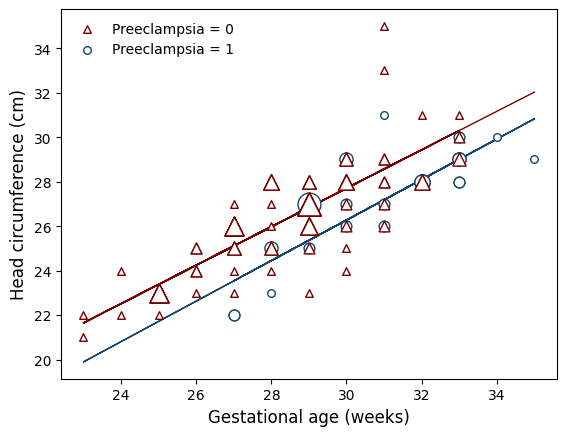

In [10]:
# Example 5: Effects of Indicator Variables

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Extract x- y-values
x1 = np.array(bwtDF['gestage'])
x2 = np.array(bwtDF['preeclamp'])
y = np.array(bwtDF['headcirc'])

# Create a DataFrame to hold variables
df = pd.DataFrame({'x1': x1, 'indicator': x2, 'y': y})

# Find minimum and maximum x
minX = min(df.x1)
maxX = max(df.x1)

# Count occurrences of each pair (x, y)
pair_counts = df.groupby(['x1', 'y']).size().reset_index(name='count')

# Merge counts back into the original DataFrame
df_with_counts = df.merge(pair_counts, on=['x1', 'y'], how='left')
df = df.merge(pair_counts, on=['x1', 'y'], how='left')

# Initialize arrays
x_line0 = np.empty(0)
x_line1 = np.empty(0)
y_line0 = np.empty(0)
y_line1 = np.empty(0)

# Separate x and y depending upon indicator value
for i, row in df.iterrows():
    if row['indicator'] == 1:
        x_line1 = np.append(x_line1,row['x1'])
        y_line1 = np.append(y_line1,row['y'])
    else:
        x_line0 = np.append(x_line0,row['x1'])
        y_line0 = np.append(y_line0,row['y'])

# Create DataFrames for different indicator values
df0 = pd.DataFrame({'x0': x_line0, 'y0': y_line0})
df1 = pd.DataFrame({'x1': x_line1, 'y1': y_line1})

# Generate OLS model for indicator = 0
X0 = sm.add_constant(df0['x0'])
model_0 = sm.OLS(df0['y0'], X0).fit()

# Generate OLS model for indicator = 1
X1 = sm.add_constant(df1['x1'])
model_1 = sm.OLS(df1['y1'], X1).fit()

# Append minX and maxX to extend regression lines
# Extend regression line for Indicator = 0
X0 = pd.concat([X0, pd.DataFrame({'x0': [minX], 'const': [1.0]})], ignore_index=True)
X0 = pd.concat([X0, pd.DataFrame({'x0': [maxX], 'const': [1.0]})], ignore_index=True)

# Extend regression line for Indicator = 1
X1 = pd.concat([X1, pd.DataFrame({'x1': [minX], 'const': [1.0]})], ignore_index=True)
X1 = pd.concat([X1, pd.DataFrame({'x1': [maxX], 'const': [1.0]})], ignore_index=True)

# Generate y values for regression lines
ols_y0 = model_0.predict(X0)
ols_y1 = model_1.predict(X1)

# Create plotting environment
fig, ax = plt.subplots()

# Assign values
color_1 = '#15466d' # Dark blue
color_2 = '#770000' # Dark red

# Plot regression line for Indicator = 0
plt.plot(X0['x0'], ols_y0,
         color=color_2,
         zorder=1,
         linewidth=1)

# Plot regression line for Indicator = 1
plt.plot(X1['x1'], ols_y1,
         color=color_1,
         zorder=1,
         linewidth=1)

# To ensure labels are only added once, use a set
labels_set = set()

# Plot values separately depending upon Indicator value
for i, row in df.iterrows():
    if row['indicator'] == 1:
        label = 'Preeclampsia = 1' if 'Preeclampsia = 1' not in labels_set else None
        ax.scatter(row['x1'], row['y'],
            s=row['count']*30,
            marker = 'o',
            zorder=2,
            facecolors='white',
            edgecolors=color_1,
            label=label)
        labels_set.add('Preeclampsia = 1')
    else:
        label = 'Preeclampsia = 0' if 'Preeclampsia = 0' not in labels_set else None
        ax.scatter(row['x1'], row['y'],
            s=row['count']*30,
            marker = '^',
            zorder=3,
            facecolors='white',
            edgecolors=color_2,
            label=label)
        labels_set.add('Preeclampsia = 0')

# Adding labels
ax.set_xlabel('Gestational age (weeks)',fontsize=12)
ax.set_ylabel('Head circumference (cm)',fontsize=12)

# Adding legend
legend=ax.legend(frameon=False)

# Adding a legend with custom marker size
legend = ax.legend(frameon=False, scatterpoints=1, fontsize=10)

# Set marker size in the legend using legend_handles
for handle in legend.legend_handles:
    handle._sizes =[30]

# Display the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image07.png)


The two lines are plotted in **Figure 18.2**. Note that the equations for the infants whose mothers were diagnosed with preeclampsia and those whose mothers were not have identical slopes. In either group, a one week increase in gestational age is associated with a 0.8740 cm increase in head circumference, on average. This is the consequence of fitting a single regression model to the two  different groups of infants. Since one line lies entirely above the other – as determined by the different y-intercepts – the equations also suggest that across all values of gestational age, children whose mothers were not diagnosed with preeclampsia have larger head circumference measurements than children whose mothers were diagnosed with preeclampsia.  

### **Exercise 5: Plotting the Effects of Indicator Variables**

In the cell below, plot the effects of the indicator `smoke` on a 2 way scatter plot of the baby's birtweight (`bwt`) and a function of the mother's weight right befor here pregnancy `lwt`.

_Code Hints:_

1. You can use this code to extract the x- and y-values:
~~~text
# Extract x- y-values
x1 = np.array(babyDF['lwt'])
x2 = np.array(babyDF['race'])
x3 = np.array(babyDF['ht'])
x4 = np.array(babyDF['ui'])
x5 =  np.array(babyDF['smoke'])
y = np.array(babyDF['bwt'])
~~~

2. You can use this code to create a DataFrame to hold the variables:
~~~text
# Create a DataFrame to hold variables
df = pd.DataFrame({'x1': x1, 'indicator': x5, 'y': y})
~~~
    Note that we assigning the name `indicator` to the `x5` which is the `smoke` variable.
3. During plotting, make sure the chang the name of the indicator:
~~~text
label = 'smoke = 1' if 'smoke = 1' not in labels_set else None
~~~
    and
~~~text
labels_set.add('smoke = 1')
~~~
    You will need to make these changes twice. The second time when `smoke = 0`.

3. Don't forget to change the x- and y-labels:
~~~text
# Adding labels
ax.set_xlabel("Mother's Weight (lbs)",fontsize=12)
ax.set_ylabel("Baby's Birth Weight (gm)",fontsize=12)
~~~

In [11]:
# Insert your code for Exercise 5 here




If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image21.png)


You should notice that the slope of the red regression line for the mother's who didn't smoke (`smoke = 0`) is steeper than the slope of the blue regression line for the mother's who smoked during pregnancy (`smoke = 1`). This means that negative effects of smoking effected larger babies more than smaller babies. Since one line lies entirely above the other – as determined by the different y-intercepts – the equations also suggest that across all values of the mother's age, babies whose mothers didn't smoke have larger birthweights than babies whose mothers didn't smoke during their pregnancy.

## **Model Selection**



As a general rule, we prefer to include in a multivariable regression model only those explanatory variables that help us to predict or to explain the observed variability in the response $( y $), the coefficients of which can be accurately estimated – what we call a parsimonious model. Consequently, if we are presented with a number of potential explanatory variables, how do we decide which ones to retain in the model and which to leave out? This decision is usually made based on a combination of statistical and nonstatistical considerations. Initially, we should have some prior knowledge as to which variables might be important. To study the full effect of each of these explanatory variables, however, it would be necessary to perform a separate regression analysis for each possible combination of the variables. The resulting models would then be evaluated according to some statistical criteria. This strategy for finding the "best" regression equation is known as the all possible models approach. While it is the most thorough method, it is also extremely time consuming. If we have a large number of potential explanatory variables, the procedure may not be feasible. As a result, we frequently resort to one of several alternative approaches for choosing a regression model. The two most commonly used procedures are known as _forward selection_ and _backward elimination_.


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image14.png)


## **Evaluation of the Model**  

After generating a least squares regression line represented by  $\hat{y} = \hat\beta_0 + \hat\beta_1x$,  we might wonder how well this model actually fits the observed data. Is it a good model? There are  several methods available to help evaluate the fit of a linear regression model.

### **Coefficient of Determination**

One way to get a sense of the fit is to compute the coefficient of determination. The coefficient of determination is represented by $R^2$, and is the square of the Pearson correlation coefficient $r$ between $Y$ and $X$; consequently,  $r^2 = R^2$.  Since _r_ can assume any value in the range −1 to 1, $R^2$ must lie between 0 and 1. If $R^2$ = 1, all  of the data points in the sample fall directly on the least squares line. If $R^2$ = 0, there is no linear  relationship between x and y. The coefficient of determination can be interpreted as the proportion of the variability among the observed values of $y$ that is explained by the linear regression of $y$ on $x$. This interpretation derives from the relationship between $\sigma_y $, the standard deviation of the outcomes of the response variable $Y$, and $\sigma_y |x$, the standard deviation of $y$ for a specified value of the explanatory variable $X$, that was presented in Section 17.1:  

From the relationship between $(\sigma_{y|x}$), the standard deviation of the outcomes of the response variable $(Y$), and $(\sigma_{y|x}$), the standard deviation of $(y$) for a specified value of the explanatory variable $(X$), that was presented in Section 17.1:

$$\sigma_{y|x}^2 = (1 - \rho^2) \sigma_y^2. $$

Recall that ($\rho$) is the correlation between $(X$) and $(Y$) in the underlying population. If we replace \(\sigma_y\) and \(\sigma_{y|x}\) by their estimators – the sample standard deviations $(s_y$) and $(s_{y|x}$) – and $(\rho$) by the Pearson correlation coefficient $(r$), we have

$$
s_{y|x}^2 = (1 - r^2) s_y^2 = (1 - R^2) s_y^2.
$$

Solving this equation for $(R^2$),

$$
R^2 = 1 - \frac{s_{y|x}^2}{s_y^2} = \frac{s_y^2 - s_{y|x}^2}{s_y^2}.
$$

Since $( s^2_{y|x} $) is the variation in the $( y $) values that still remains after accounting for the linear relationship between $( y $) and $( x $), $( s^2_y - s^2_{y|x} $) must be the variation in $( y $) that is explained by this relationship. Thus, $( R^2 $) is the proportion of the total observed variability among the $( y $) values that is explained by the linear regression of $( y $) on $( x $).

For the regression of head circumference on gestational age, the coefficient of determination can be shown to be

$$ R^2 = 0.6095.$$


### Example 6: Plot Residuals

The code in the cell recreates **Figure 18.4** using Python. This figure is a 2-way scatterplot of `Residuals` versus the fitted values of the head cicumference.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image15.png)

**FIGURE 18.4** Residuals versus fitted values of head circumference

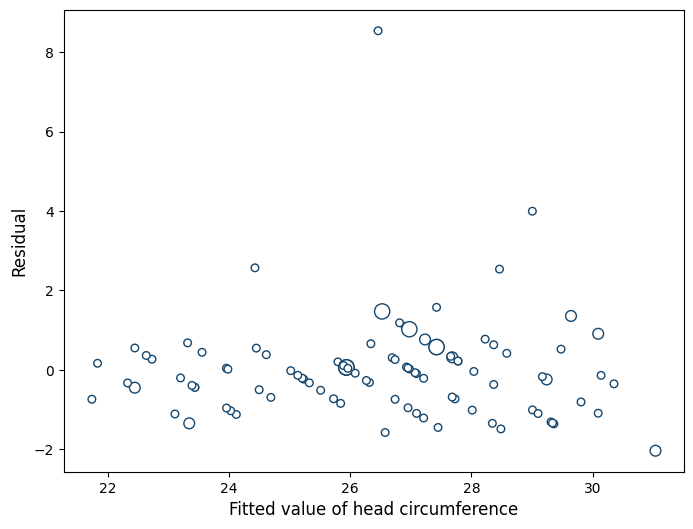

In [12]:
# Example 6: Plot residuals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Calculate pair counts and merge back to the original DataFrame
df_with_counts = bwtDF.merge(
    bwtDF.groupby(['birthwt', 'headcirc']).size().reset_index(name='count'),
    on=['birthwt', 'headcirc'],
    how='left'
)

# Extract counts as a numpy array
counts = df_with_counts['count'].values

# Create X with independent variables and fit regression model
X = sm.add_constant(bwtDF[['gestage', 'birthwt']])
model = sm.OLS(bwtDF['headcirc'], X).fit()

# Compute fitted values for y and residuals
fitted_y = model.predict(X)
residuals = bwtDF['headcirc'] - fitted_y

# Create plotting environment
fig, ax = plt.subplots(figsize=(8, 6))
color_1 = '#15466d'  # Dark blue

# Plot residuals
ax.scatter(fitted_y, residuals, s=counts * 30, facecolor='white', edgecolor=color_1)

# Set x and y limits and add labels
#ax.set(xlim=(20, 32), ylim=(-4, 10))
ax.set_xlabel('Fitted value of head circumference', fontsize=12)
ax.set_ylabel('Residual', fontsize=12)

# Show the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image16.png)

This figure displays a scatter plot of the residuals from the model containing both gestational age and birth weight versus the fitted values of the head circumference form the same model for the sample of 100 low birth weight infants. There is one residual with a particularly large value that could be considered an outlier: this point corresponds to a child with gestational age 31 weeks, birth weight 900 grams, and a head circumference 45 cm. We would predict the infant's hear circumference to be only

$$ \hat{y} = 8.3080 + 0.4487(31) + 0.0047(900) = 26.5 \text{ cm} $$


### **Exercise 6: Plot Residuals**

In the cell below, write the code to generate a 2-way scatterplot of `Residuals` versus the fitted values of the birth weight (`bwt`) in the `babyDF` DataFrame.

In [13]:
# Example 6: Plot residuals



If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image22.png)

This figure displays a scatter plot of the residuals from the model containing: `lwt`, `race`, `ht`, `ui`, `smoke` as the independent variables and `bwt` as the independent variable.



### Example 7: 2-Way Scatter Plot

The code in the cell recreates **Figure 18.5** using Python. This figure is a 2-way scatterplot of the baby's length as a function of the mother's age.  

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image17.png)

**FIGURE 18.5** Length versus mother's age for a sample of 100 low birth weight infants.

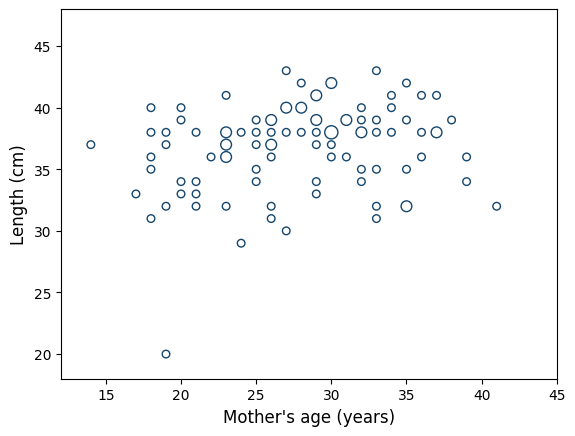

In [14]:
# Example 7: 2-Way scatter plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame and count occurrences of each pair (x, y)
df_with_counts = (bwtDF[['momage', 'length']]
                  .groupby(['momage', 'length'])
                  .size()
                  .reset_index(name='count'))

# Extract counts as a numpy array
counts = df_with_counts['count'].values

# Create plotting environment
fig, ax = plt.subplots()
color_1 = '#15466d'  # Dark blue

# Create the scatter plot with varying marker size
ax.scatter(df_with_counts['momage'], df_with_counts['length'],
           s=counts * 30, facecolor='white', edgecolor=color_1)

# Set x and y limits and add labels
ax.set(xlim=(12, 45), ylim=(18, 48))
ax.set_xlabel("Mother's age (years)", fontsize=12)
ax.set_ylabel('Length (cm)', fontsize=12)

# Display the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image18.png)

Based on this graph, the baby's length does _not_ appear to depend upon the mother's age. Specifically, as the mother's age increases, there is no indication that the length of her baby increases.

### Example 8: Compute $R^2$

The code in the cell below recreates the **_Stata_** output shown on page 443 in your textbook.

**Stata** is a general-purpose statistical software package developed by StataCorp. It is widely used for data manipulation, visualization, statistical analysis, and automated reporting. Researchers across various fields, including biomedicine, economics, epidemiology, and sociology, rely on Stata for their data science needs.

Some key features of Stata include:
- **Data manipulation**: Handling and transforming data efficiently.
- **Visualization**: Creating high-quality graphs and charts for data analysis.
- **Statistics**: Performing a wide range of statistical analyses.
- **Automated reporting**: Generating reports and exporting results in various formats.

Stata is known for its user-friendly interface, which includes both a command-line interface and a graphical user interface. It supports multiple platforms, including Windows, macOS, and Linux.

The cost of a Stata license can vary depending on the type of license and the duration. Here are some general pricing options:

- **Annual License**: Starting from **\$765 per year**.
- **Perpetual License**: Typically around **\$1,440** for a single-user license.
- **Student License**: Around **\$48 for a 6-month license**.

There are also volume discounts for purchasing multiple licenses and network licenses for concurrent use. For the most accurate pricing, it's best to contact Stata directly or visit their [official website](https://www.stata.com/order/).


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_10_image23.png)

In [15]:
# Example 8; Compute r-squared

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Fit regression model
X = sm.add_constant(bwtDF[['gestage','momage']])
model = sm.OLS(bwtDF['length'], X).fit()

# Print header
print("-----Model Summary -------------------------------------------------------------")

# Print model summary
print(model.summary())


-----Model Summary -------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                 length   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     40.91
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.31e-13
Time:                        19:50:36   Log-Likelihood:                -238.11
No. Observations:                 100   AIC:                             482.2
Df Residuals:                      97   BIC:                             490.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

If the code is correct, you should see the following output:

~~~text

-----Model Summary -------------------------------------------------------------
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 length   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     40.91
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.31e-13
Time:                        19:50:36   Log-Likelihood:                -238.11
No. Observations:                 100   AIC:                             482.2
Df Residuals:                      97   BIC:                             490.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0909      3.088      2.943      0.004       2.961      15.221
gestage        0.9361      0.109      8.562      0.000       0.719       1.153
momage         0.0247      0.046      0.534      0.595      -0.067       0.117
==============================================================================
Omnibus:                       44.442   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.165
Skew:                          -1.539   Prob(JB):                     2.70e-30
Kurtosis:                       7.818   Cond. No.                         469.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~

### **Exercise 8: Compute $R^2$**

In the cell below, compute the value for $R^2$ for the `babyDF` DataFrame. Simply reuse your code from **Exercise 4**.

In [16]:
# Insert your code for Exercise 8 here



If your code is correct, you should see the following output:

~~~text
-----Model Summary -------------------------------------------------------------
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     10.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           8.57e-09
Time:                        09:55:39   Log-Likelihood:                -1489.9
No. Observations:                 189   AIC:                             2992.
Df Residuals:                     183   BIC:                             3011.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3105.6821    271.575     11.436      0.000    2569.862    3641.502
lwt            3.4321      1.648      2.083      0.039       0.181       6.683
race        -188.7642     56.339     -3.350      0.001    -299.922     -77.606
ht          -595.7334    201.479     -2.957      0.004    -993.253    -198.214
ui          -522.3361    135.951     -3.842      0.000    -790.570    -254.103
smoke       -364.7080    104.323     -3.496      0.001    -570.539    -158.877
==============================================================================
Omnibus:                        1.676   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.625
Skew:                          -0.141   Prob(JB):                        0.444
Kurtosis:                       2.644   Cond. No.                         791.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~

You have to admit that since Python and Colab are free, there isn't really any reason to pay for a **Stata** license. :-)

## **Lesson Turn-in**

When you have completed and run all of the code cells, create a PDF of your notebook and upload the **_PDF_** to your Lesson_03_10 assignment in Canvas for grading.
